<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Assignment/0506_Python_Machine_Learning_p183-p227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 04. 분류

## **01. 분류(Classification)의 개요**
---

지도학습: 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

* 분류(Classification): 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것  
    * 다양한 머신러닝 알고리즘으로 구현 가능
    * 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈
    * 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
    * 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
    * 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
    * 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
    * 심층 연결 기반의 신경망(Neural Network)
    * 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

* 앙상블은 분류에서 가장 각광 받는 방법 중 하나이다.
    * 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨
        * 배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘
        * 부스팅 방식의 효시인 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠지만, XgBoost(eXtra Gradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘 계속 등장
    * 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리





## **02. 결정 트리**
---
: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

* 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우
* 결정 트리의 구조
    * 규칙(Decision Node)로 표시된 노드는 규칙 조건을 만드는 것
    * 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값
    * 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성
    * 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성 높음
* 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
    * 정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 됨
* 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수 존재
    * 정보 이득은 엔트로피 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음.  
    정보 이득 지수 = 1-엔트로피 지수
    결정 트리는 정보 이득이 높은 속성을 기준으로 분할
    * 지니 계수는 0이 가장 평등하고 1로 갈수록 불평등하다는 불평등 지수를 나타날 때 사용하는 계수임. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할
* 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.
* 결정 트리의 일반적인 알고리즘은 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

> ### 결정 트리 모델의 특징
> ---

|결정 트리 장점|결정 트리 단점|
|---|---|
|쉽다, 직관적이다.|과적합으로 알고리즘 성능이 떨어진다.|
|피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음|이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요|

> ### 결정 트리 파라미터
> ---

* 사이킷런은 결정 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공한다.
    * DecisionTreeClassifier는 분류를 위한 클래스이며, DecisionTreeRegressor는 회귀를 위한 클래스
    * 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반

|파라미터 명|설명|
|---|---|
|**`min_samples_split`**|노드를 분할하기 위한 최소한의 샘플 데이터수로 과적합을 제어하는 데 사용됨|
| |디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가|
|**`min_samples_leaf`**|말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수|
| |과적합 제어 용도|
| |비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요|
|**`max_features`**|최적의 분할을 위해 고려할 최대 피처 개수|
| |디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행|
| | int, float, sqrt(auto), log, None 등|
|**`max_depth`**|트리의 최대 깊이 규정|
| |디폴트는 None으로 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나
| |노드가 가지는 데이터 개수가 `min_samples_split`보다 작아질 때까지 계속 깊이를 증가시킴|
| |깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요|
|**`max_leaf_nodes`**|말단 노드(Leaf)의 최대 개수|

> ### 결정 트리 모델의 시각화
> ---

* 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법은 Graphviz 패키지를 사용하는 것이다.
    * Graphviz는 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
* 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 **`export_graphviz()`** API를 제공한다.
    * 함수 인자로 학습이 완료된 Estimator, Feature의 이름 리스트, 레이블 이름 리스트 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

In [1]:
## DecisionTreeClassifier를 제공해 결정 트리 모델의 학습과 예측 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
## Graphviz를 통해 그래프 형태로 시각화할 수 있는 출력 파일 생성
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

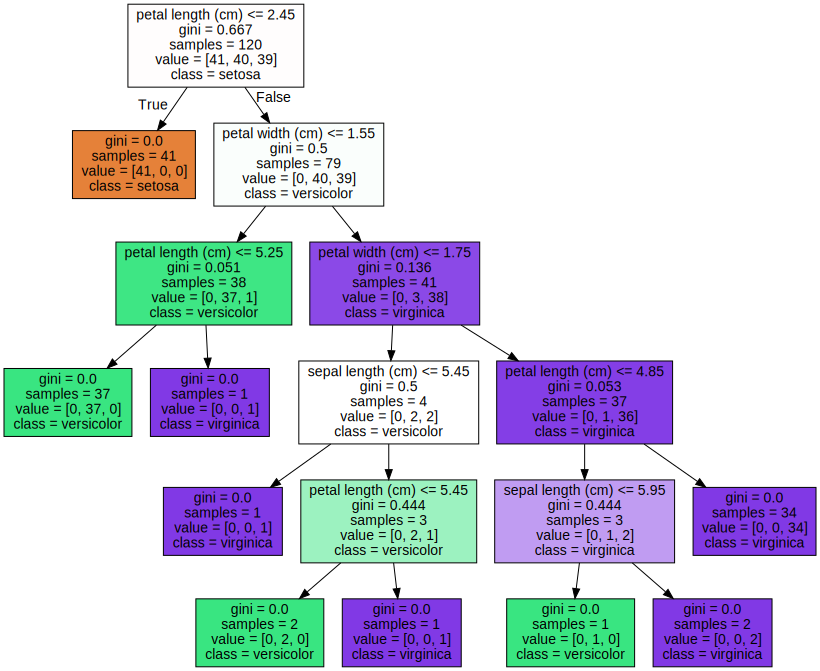

In [3]:
## 결정 트리 규칙 시각화
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 더 이상 자식 노드가 없는 노드는 리프 노드로 최증 클래스(레이블) 값이 결정되는 노드이다.
    * 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
* 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다.
* 노드 내에 기술된 지표의 의미
    * petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드
    * gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수
    * samples는 현 규칙에 해당하는 데이터 건수
    * value=[ ]는 클래스 값 기반의 데이터 건수
* 각 노드의 색깔은 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.

* 결정 트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다.
    * `max_depth`는 결정 트리의 최대 트리 깊이를 제어
        * 제한 없음에서 3개로 설정하면 트리 깊이가 설정된 `max_depth`에 따라 줄어들면서 더 간단한 결정 트리 됨
    * `min_samples_split`는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
    * `min_samples_leaf`는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정
        * `min_samples_leaf` <= 지정 값 기준만 만족하면 리프 노드가 될 수 있음. `min_samples_leaf` 값을 변경하면 리프 노드가 될 수 있는 조건이 완화됙 때문에 리프 노드를 만들기 위해 규칙 조건이 변하게 됨

* 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **`feature_importances_`** 속성으로 제공한다.
    * 값이 높을수록 해당 피처의 중요도가 높다는 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


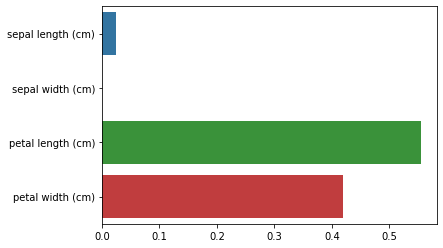

In [4]:
## fit()으로 학습된 객체 변수에서 feature_importances_ 속성 가져와 feature별로 중요도값 매핑하고 표현

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

> ### 결정 트리 과적합(Overfitting)
> ---

* 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **`make_classification()`** 함수를 제공한다.
    * `make_classification()` 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

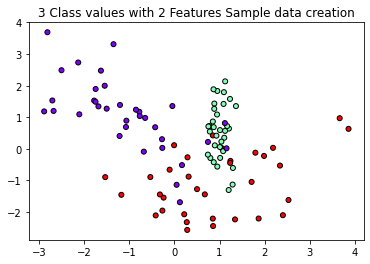

In [5]:
## 분류를 위한 데이터 세트 임의로 만들기

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

    각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 되어 있음.

* 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화

In [6]:
## 별도의 함수 visualize_boundary() 생성

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

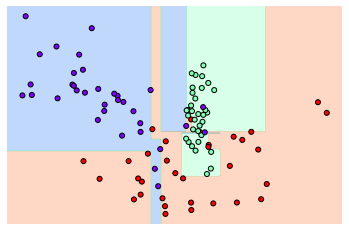

In [7]:
## 결정 트리에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계 시각화

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

    일부 이상치 (Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐.
    이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨.

* 리프 노드 생성규칙 완화한 뒤 하이퍼 파라미터 변경하여 결정 기준 경계 변화 살펴보기

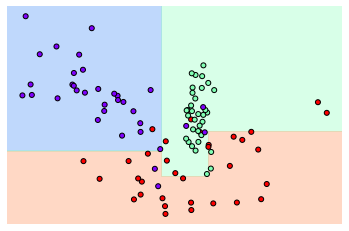

In [8]:
## 6개 이하의 데이터에는 리프 노드를 생성할 수 있도록 생성 규칙 완화

# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

    이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음.

## **03. 앙상블 학습**
---

> ### 앙상블 학습 개요
> ---

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법 

* 앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이외에도 스태킹을 포함한 다양한 앙상블 방법이 있다.
    * 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식인데, 보팅의 경우는 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우는 각각의 분류기가 모두 같은 유형의 알고리즘 기반이며 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것임  
    대표적인 배깅 방식이 랜덤 포레스트 알고리즘
    * 부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것임  
    예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost) 존재
    * 스태킹은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

> ### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
> ---

* 하드 보팅을 이용한 분류(Classification)는 다수결 원칙과 비슷한 것으로 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것이다.
* 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것이다. 일반적으로 적용되는 방법이다.

> ### 보팅 분류기(Voting Classifier)
* 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공하고 있다.

* 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측 분석

In [9]:
## 필요한 모듈과 데이터 로딩

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer() #자체에서 유방암 데이터 세트 생성 가능

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있다.
    * VotingClassifier 클래스는 주요 생성 인자로 `estimators`와 `voting` 값을 입력 받음
        * `estimators`: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
        * `voting`: '`hard`' 시 하드 보팅, '`soft`' 시 소프트 보팅 방식을 적용하라는 의미(기본은 '`hard`')

In [10]:
## 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 만들기

# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


* ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 된다. 이런 관점에서 편향-분산 트레이드 오프는 ML 모델이 극복해야 할 중요 과제이다.
* 앙상블 학습에서는 여러 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있다. 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화할 수 있다는 것이다.

## **04. 랜덤 포레스트**
---

> ### 랜덤 포레스트의 개요 및 실습
> ---

배깅(bagging): 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

* 배깅의 대표적인 알고리즘은 랜덤 포레스트이다.
    * 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
    * 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트로 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라 함
    * 랜덤 포레스트의 서브세트(Subset) 데이터는 부트스트래핑으로 데이터가 임의로 만들어지고 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐
    * 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함
    

In [11]:
## 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수 생성

import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [12]:
## 사용자 행동 데이터 세트에 DataFrame을 반환하는 함수 만들기

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

Mounted at /content/drive


In [13]:
## 학습/테스트용 데이터프레임 가져오기

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


> ### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
> ---

* 트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모된다는 것이다.
* 랜덤 포레스트가 하이퍼 파라미터가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문이다.
    * **`n_estimators`**: 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10개. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니며 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함
    * `max_features`: 결정 트리에 사용된 `max_features` 파라미터와 같음. 하지만 '`None`'이 아니라 '`auto`', 즉 '`sqrt`'와 같음. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조
    * `max_depth`나 `min_samples_leaf`와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 똑같이 적용될 수 있음

* GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝
    * 랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능하기 때문에 뒤에 소개할 그래디언트 부스팅보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많음
    * 멀티 코어 한경에서는 RandomForestClassifier 생성자와 GridSearchCV 생성 시 `n_jobs = -1 `파라미터를 추가하면 모든 CPU 코어를 이용해 학습 가능

In [14]:
## GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [15]:
## n_estimators를 300으로 증가, 별도의 테스트 세트에서 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


* RandomForestClassifier 역시 DecisionTreeClassifier와 똑같이 `feature_importances_` 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있다.

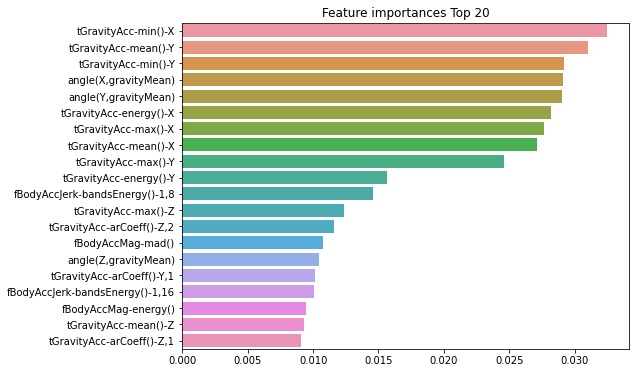

In [16]:
## 피처 중요도를 막대그래프로 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y=ftr_top20.index)
plt.show()